# Summer Challenge on Automatic Assessment of "True/False" Questions on Handwritten Answer Sheet, under NCVPRIPG'24

**NCVPRIPG'24: [Link](https://ncvpripg2024.github.io/)** <br>
**Challenge Website: [Link](https://vl2g.github.io/challenges/AutoEval2024/#task)**

### OCR with PaddleOCR [(Link)](https://github.com/JaidedAI/EasyOCR)

**Install PaddleOCR** <br>
[Link](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.7/doc/doc_en/quickstart_en.md)

In [ ]:
# If you have no available GPU on your machine, please run the following command to install the CPU version
# It will always ask for the restart of the run-time. Thus, install it at the very begining
!python -m pip install paddlepaddle -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [ ]:
#Install PaddleOCR Whl Package
!pip install "paddleocr>=2.0.1" # Recommend to use version 2.0.1+

**Load the Libraries**

In [ ]:
import os
import shutil
import cv2

import matplotlib.pyplot as plt

import PIL.Image
from PIL import Image

**User Input: Upload the image**

In [ ]:
from google.colab import files

image_path = "/content/sample_image.jpg"

if os.path.exists(image_path) == True:
  !rm sample_image.jpg

uploaded_image = files.upload()

img = list(uploaded_image.keys())
given_img_lbl = str(img[0])
img1 = 'sample_image.jpg'

old_name = '/content/'+ given_img_lbl
new_name = "/content/" + img1
os.rename(old_name, new_name)

img2 = '/content/'+img1
print("Image path: ",img2)

Saving Image_20240420_212644_804.jpeg to Image_20240420_212644_804.jpeg
Image path:  /content/sample_image.jpg


**Visualize the uploaded image**

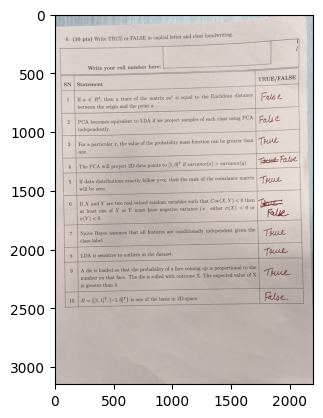

In [ ]:
sample_image = cv2.imread(img2)
plt.figure(figsize = (15,10))
plt.imshow(sample_image);

In [ ]:
from paddleocr import PaddleOCR,draw_ocr

ocr = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:16<00:00, 241kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:18<00:00, 564kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:14<00:00, 151kiB/s]

[2024/04/20 20:01:50] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [ ]:
# Extarct the text from PaddleOCR --> This will give several outputs like text and bounding boxes
result = ocr.ocr(image_path, cls=True)

[2024/04/20 20:01:52] ppocr DEBUG: dt_boxes num : 41, elapsed : 0.5302553176879883
[2024/04/20 20:01:52] ppocr DEBUG: cls num  : 41, elapsed : 0.12886333465576172
[2024/04/20 20:01:56] ppocr DEBUG: rec_res num  : 41, elapsed : 3.8966574668884277


**Plot the Bounding Boxes (BB) from EasyOCR**

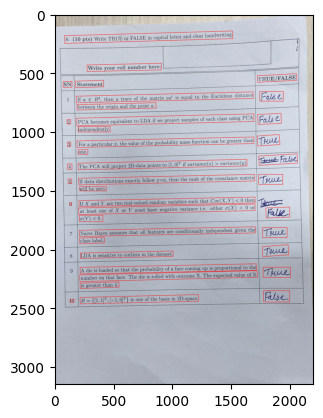

In [ ]:
new_result = result[0]

boxes = [line[0] for line in new_result]
txts = [line[1][0] for line in new_result]
scores = [line[1][1] for line in new_result]

image = Image.open(image_path).convert('RGB')

im_show = draw_ocr(image, boxes)
im_show = Image.fromarray(im_show)
plt.figure(figsize = (15,10))
plt.imshow(im_show);

**Save the extracted text**

In [ ]:
# Get the entire text as a list
all_text_Str = ' '.join(map(str, txts))

with open('/content/PaddleOCR_Output_Text.txt', 'w', encoding='utf8') as file:
  file.write(all_text_Str)